In [1]:
import numpy as np
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity

from gem.embedding.sdne import SDNE
from gem.evaluation import evaluate_graph_reconstruction as gr
from gem.utils import graph_util

# Instatiate the embedding method with hyperparameters
sdne = SDNE(d=2, beta=1, alpha=1e-2, nu1=1e-3, nu2=1e-3, K=2, n_units=[256,],
            rho=0.3, n_iter=500, xeta=0.01, n_batch=500)

# Load graph
# G = graph_util.loadGraph('gem/data/karate.edgelist')
# G = nx.karate_club_graph().to_directed()
# G = nx.read_gml("embedded_football.gml").to_directed()
G = nx.read_edgelist("Uetz_screen.txt")
G = max(nx.connected_component_subgraphs(G), key=len).to_directed()

# second level similarity
S1 = np.array(nx.adj_matrix(G).todense())
S2 = cosine_similarity(S1)

# similarity matrix (for weights)
S = S1 + 5 * S2

nodes = np.array(G.nodes())
weights = {(u, v): S[np.where(nodes==u)[0], np.where(nodes==v)[0]][0] for u, v in G.edges()}

# set weights 
nx.set_edge_attributes(G, "weight", weights)

# Learn embedding - accepts a networkx graph or file with edge list
Y, t = sdne.learn_embedding(G, edge_f=None, is_weighted=True, no_python=True)

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GT 650M (0000:01:00.0)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
nx.get_node_attributes(G, "value").values()

[]

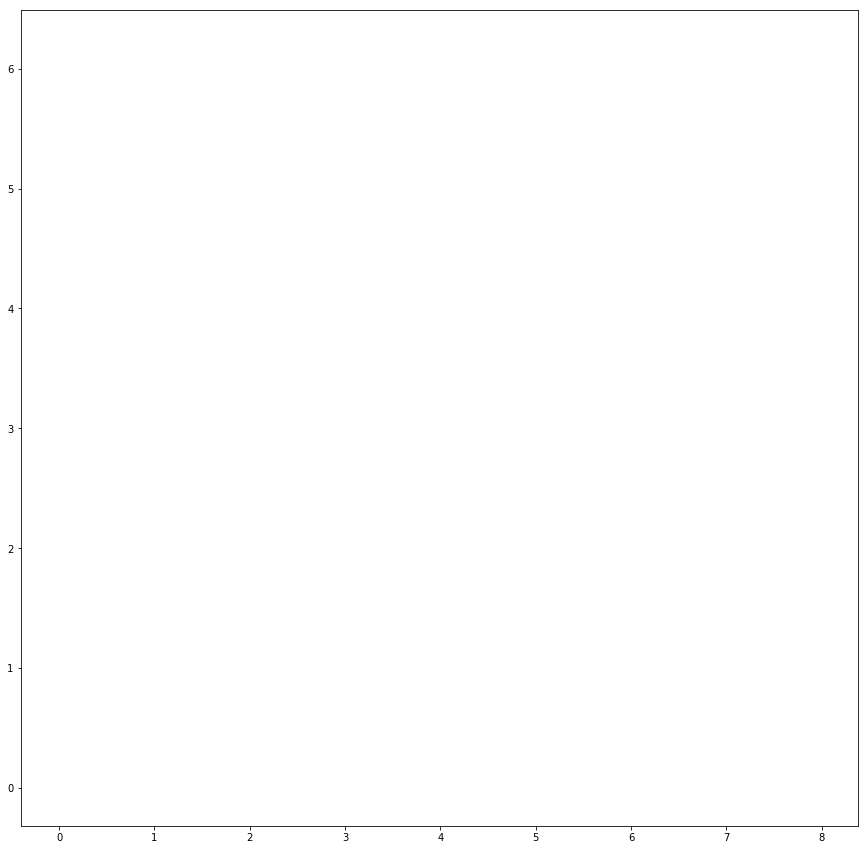

In [6]:
plt.figure(figsize=(15, 15))
plt.scatter(Y[:, 0], Y[:, 1], c=nx.get_node_attributes(G, "value").values(), s=100)

In [5]:
Y

array([[ 4.81299925,  0.        ],
       [ 1.73837757,  0.86083335],
       [ 2.33675408,  0.09888738],
       [ 2.07140088,  0.        ],
       [ 5.40715742,  1.58188295],
       [ 6.50428152,  1.82144618],
       [ 7.9725318 ,  3.84966159],
       [ 2.34346724,  0.        ],
       [ 4.2549448 ,  5.81600094],
       [ 1.98856163,  1.8730669 ],
       [ 6.90420008,  3.93155503],
       [ 2.50305939,  1.6094296 ],
       [ 2.59698772,  1.29181814],
       [ 2.27787876,  0.        ],
       [ 3.38684726,  3.79058647],
       [ 3.38684726,  3.79058647],
       [ 5.49062109,  3.05879045],
       [ 2.82154584,  0.45121461],
       [ 3.38684726,  3.79058647],
       [ 2.86706638,  0.60937577],
       [ 3.38684726,  3.79058647],
       [ 2.82154584,  0.45121461],
       [ 3.38684726,  3.79058647],
       [ 2.18509722,  4.07235289],
       [ 0.        ,  1.55830491],
       [ 0.49462795,  1.58149409],
       [ 2.60974503,  2.75327921],
       [ 1.18003464,  2.32143855],
       [ 0.97961146,